In [1]:
import torch
from torchvision.datasets import STL10, CIFAR10
from torchvision.transforms import ToTensor, Compose, RandomHorizontalFlip, RandomResizedCrop, RandomApply, ColorJitter, RandomGrayscale, GaussianBlur, Normalize, ToPILImage
from torch.utils.data.dataloader import DataLoader
from torch.utils.data.dataset import Dataset
from torch.utils.data import random_split
import matplotlib.pyplot as plt
from torchvision.utils import make_grid
from torch.nn import Module, Conv2d, ReLU, Linear, MaxPool2d, Dropout, PReLU
from torch.optim import Adam
import numpy as np

c:\Users\altaf\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

if device.type == "cuda":
    torch.cuda.get_device_name()


In [10]:
dataset = CIFAR10(root='data/', download=True, transform=ToTensor())
test_dataset = CIFAR10(root='data/', train=False, transform=ToTensor())

Files already downloaded and verified


In [11]:
torch.manual_seed(43)
val_size = 5000
train_size = len(dataset) - val_size

In [12]:
train_ds, val_ds = random_split(dataset, [train_size, val_size])
len(train_ds), len(val_ds)

(45000, 5000)

In [13]:
batch_size = 128

In [14]:
labels = []
for _, label in dataset:
    labels.append(label)

In [15]:
labels = torch.Tensor(labels)

In [16]:
test_labels = []
for _, test_label in test_dataset:
    test_labels.append(test_label)

In [17]:
test_labels = torch.Tensor(test_labels)

In [18]:
dataset.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [19]:
CIFARdataTest = []

labels_of_interest = [1, 7, 8, 9]
for i in range(4):
    cl = []
    print(i)
    for label, data in zip(test_labels, test_dataset.data):

        if int(label.numpy()) == labels_of_interest[i]:
            cl.append(data)

    CIFARdataTest.append(np.array(cl))

0
1
2
3


In [20]:
CIFARdataTest = np.array(CIFARdataTest)

In [21]:
np.savez('CIFARDataTest.npz', CIFARdataTest)

In [22]:
CIFARdataShort = [] 
labels_of_interest = [1, 7, 8, 9]

for i in range(4):
    cl = []
    print(i)
    for label, data in zip(labels, dataset.data):
        if int(label.numpy()) == labels_of_interest[i]:
            cl.append(data)

    CIFARdataShort.append(np.array(cl)[:500])

0
1
2
3


In [23]:
CIFARdataShort = np.array(CIFARdataShort)

In [24]:
np.savez('CIFARDataShort.npz', CIFARdataShort)

In [26]:
CIFARdata = [] 
CIFARValData = []
labels_of_interest = [1, 7, 8, 9]

for i in range(4):
    cl = []
    print(i)
    for label, data in zip(labels, dataset.data):
        if int(label.numpy()) == labels_of_interest[i]:
            cl.append(data)
    
    CIFARdata.append(np.array(cl)[:4500])
    CIFARValData.append(np.array(cl)[4500:])

0
1
2
3


In [27]:
CIFARdata = np.array(CIFARdata)

In [28]:
CIFARValData = np.array(CIFARValData)

In [29]:
np.savez('CIFARData.npz', CIFARdata)

In [30]:
np.savez('CIFARValData.npz', CIFARValData)

In [60]:
check =  np.load('CIFARData.npz')['arr_0']

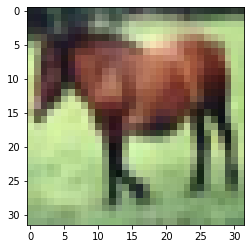

In [62]:
plt.imshow(check[3][0])

In [3]:
from dataset import CIFAR10Ds

CIFAR10Data = np.load('CIFARData.npz')['arr_0'].reshape(-1, 32, 32, 3)
CIFAR10DataShort = np.load('CIFARDataShort.npz')['arr_0'].reshape(-1, 32, 32, 3)

CifarDataset = CIFAR10Ds(CIFAR10Data)

In [4]:
dataloader = DataLoader(CifarDataset, batch_size=1, shuffle=True)

In [5]:
from utils import imshow

3534


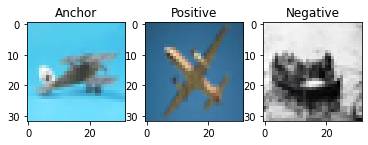

15356


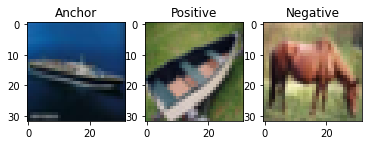

11594


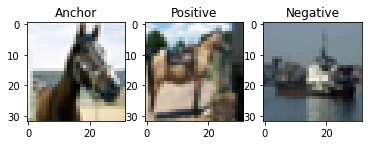

10203


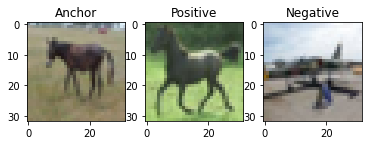

9821


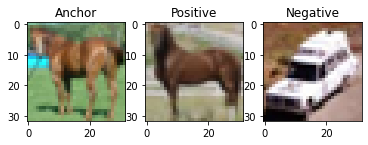

12066


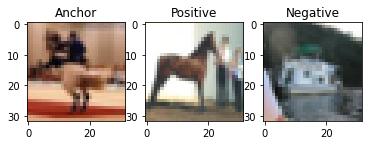

8355


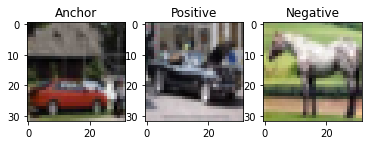

12609


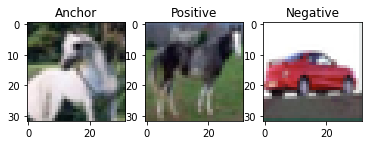

10482


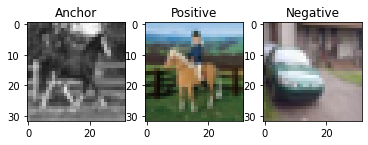

15245


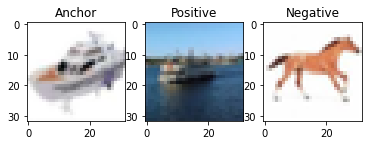

In [8]:
count = 0
for batchno, batch in enumerate(dataloader):
    count += 1
    imshow(batch[0], batch[1], batch[2])
    if count == 10:
        # print(batch[3])
        break

In [14]:
int(4//4500)

0

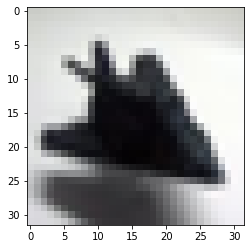

In [20]:
plt.imshow(CIFARdataShort[0][0])

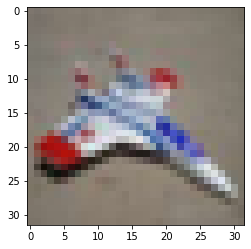

In [21]:
plt.imshow(CIFARdataShort[0][1])

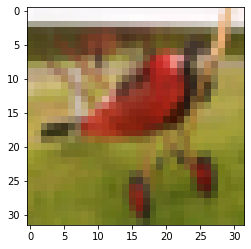

In [22]:
plt.imshow(CIFARdataShort[0][2])

In [1405]:
for i in range(10):
    print(CIFARdataShort[i].shape)

(100, 32, 32, 3)
(100, 32, 32, 3)
(100, 32, 32, 3)
(100, 32, 32, 3)
(100, 32, 32, 3)
(100, 32, 32, 3)
(100, 32, 32, 3)
(100, 32, 32, 3)
(100, 32, 32, 3)
(100, 32, 32, 3)


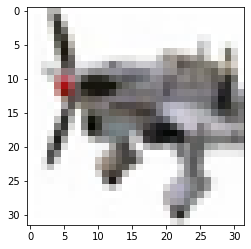

In [23]:
plt.imshow(CIFARdataShort[0][3])

In [1406]:
class CIFAR10Ds(Dataset):
    def __init__(self, data, training=True):
        self.data = data.reshape(-1, 32, 32, 3)
        # self.labels = labels

        # strength = 1
        # # Color jitter from https://github.com/google-research/simclr/blob/master/data_util.py
        # self.transform = Compose([
        #     ToPILImage(),
        #     RandomHorizontalFlip(), 
        #     RandomResizedCrop(size=32), #CIFAR10 img size 
        #     RandomApply([ColorJitter(brightness=0.8*strength, contrast=0.8*strength, saturation=0.8*strength, hue=0.2*strength)], p=0.8),
        #     RandomGrayscale(0.2),
        #     ToTensor(),
        #     # CIFAR10 img stats
        #     Normalize(mean=[0.49139968, 0.48215827 ,0.44653124], std=[0.24703233, 0.24348505, 0.26158768])
        # ])

        self.training = training
 
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):

        # print(idx)
        anchor_class = np.random.randint(0, 10)
        negative_class = np.random.randint(0, 10) 

        while negative_class == anchor_class:
            negative_class = np.random.randint(0, 10) 
        
        anchor = np.random.randint(0, 5000)
        positive = np.random.randint(0, 5000)
        negative = np.random.randint(0, 5000)

        # print(self.data[negative_class].shape)

        anchor_img = ToTensor()(self.data[anchor_class*5000 + anchor].reshape(32, 32, 3))
        positive_img = ToTensor()(self.data[anchor_class*5000 + positive].reshape(32, 32, 3))
        # negative_img = ToTensor()(self.data[negative_class*5000 + negative].reshape(32, 32, 3)) SUPERVISED
        negative_img = ToTensor()(self.data[negative_class*5000 + negative].reshape(32, 32, 3)) 


        return [anchor_img, positive_img, negative_img]
        
        # anchoroOG = self.data[idx].reshape(32, 32, 3)
        # anchor = self.transform(anchoroOG)
        # positive = self.transform(anchoroOG)

        # neg_idx = np.random.randint(1, len(self.data))
        # negative = ToTensor()(self.data[neg_idx].reshape(32, 32, 3))

        # # if np.random.randint(0, 2):
        # negative = self.transform(negative)    

        # return [anchor, positive, negative]

In [1415]:
class CIFAR10DsShort(Dataset):
    def __init__(self, data, short, training=True):
        self.data = data.reshape(-1, 32, 32, 3)
        self.short = short.reshape(-1, 32, 32, 3)

        # self.labels = labels

        # strength = 1
        # # Color jitter from https://github.com/google-research/simclr/blob/master/data_util.py
        # self.transform = Compose([
        #     ToPILImage(),
        #     RandomHorizontalFlip(), 
        #     RandomResizedCrop(size=32), #CIFAR10 img size 
        #     RandomApply([ColorJitter(brightness=0.8*strength, contrast=0.8*strength, saturation=0.8*strength, hue=0.2*strength)], p=0.8),
        #     RandomGrayscale(0.2),
        #     ToTensor(),
        #     # CIFAR10 img stats
        #     Normalize(mean=[0.49139968, 0.48215827 ,0.44653124], std=[0.24703233, 0.24348505, 0.26158768])
        # ])

        self.training = training
 
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):

        # print(idx)
        anchor_class = np.random.randint(0, 10)
        negative_class = np.random.randint(0, 10) 
        
        anchor = np.random.randint(0, 100)
        positive = np.random.randint(0, 100)
        negative = np.random.randint(0, 5000)

        # print(self.data[negative_class].shape)

        anchor_img = ToTensor()(self.short[anchor_class*100 + anchor].reshape(32, 32, 3))
        positive_img = ToTensor()(self.short[anchor_class*100 + positive].reshape(32, 32, 3))
        # negative_img = ToTensor()(self.data[negative_class*5000 + negative].reshape(32, 32, 3)) SUPERVISED
        negative_img = ToTensor()(self.data[negative_class*5000 + negative].reshape(32, 32, 3)) 

        return [anchor_img, positive_img, negative_img]

In [1232]:
class STL10Ds(Dataset):
    def __init__(self, data, training=True):
        self.data = data

        strength = 1
        # Color jitter from https://github.com/google-research/simclr/blob/master/data_util.py
        self.transform = Compose([
            ToPILImage(),
            RandomHorizontalFlip(), 
            RandomResizedCrop(size=96), #CIFAR10 img size 
            RandomApply([ColorJitter(brightness=0.8*strength, contrast=0.8*strength, saturation=0.8*strength, hue=0.2*strength)], p=0.8),
            RandomGrayscale(0.2),
            ToTensor(),
            # CIFAR10 img stats
            # Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        ])

        self.training = training
 
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        anchoroOG = self.data[idx].reshape(96, 96, 3)
        anchor = self.transform(anchoroOG)
        positive = self.transform(anchoroOG)

        neg_idx = np.random.randint(1, len(self.data))
        negative = ToTensor()(self.data[neg_idx].reshape(96, 96, 3))

        if np.random.randint(0, 2):
            negative = self.transform(negative)    

        return [anchor, positive, negative]

In [1417]:
test = CIFAR10DsShort(CIFARdata, CIFARdataShort)

In [1076]:
test = STL10Ds(imgs)

In [1476]:
img = test.__getitem__(99)

In [1477]:
img[0].size()

torch.Size([3, 32, 32])

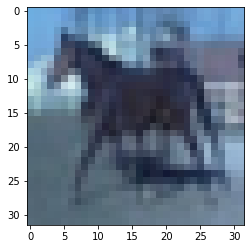

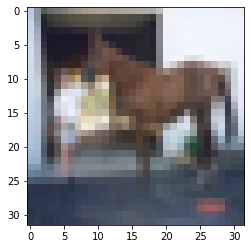

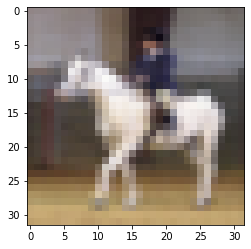

In [1445]:
# ADAPTED

img = test.__getitem__(99)

def imshow(img):
   """
   shows an imagenet-normalized image on the screen
   """
   # mean = torch.tensor([0.485, 0.456, 0.406], dtype=torch.float32)
   # std = torch.tensor([0.229, 0.224, 0.225], dtype=torch.float32)
   # unnormalize = Normalize((-mean / std).tolist(), (1.0 / std).tolist())
   # npimg = unnormalize(img).numpy()
   npimg = img.numpy()
   plt.imshow(np.transpose(npimg, (1, 2, 0)))
   plt.show()

# def imshow(img):
#    plt.imshow(img[0])
#    plt.imshow(img[1])
#    plt.imshow(img[2])
#    plt.show()


# 99 is the image id 
imshow(img[0])
imshow(img[1])
imshow(img[2])
# imshow(dataset[99][0][0])
# imshow(dataset[99][0][0])
# imshow(dataset[99][0][0])

In [1463]:
dataloader = DataLoader(test, batch_size=128, shuffle=False)

In [1464]:
for batchno, batch in enumerate(dataloader):
    # print(batchno)

    # if batchno == 3:
    #     for ex in batch:
    #         for img in ex:
    #             imshow(img)

        break

In [1465]:
batch[0].size()

torch.Size([128, 3, 32, 32])

In [1454]:
class SiameseNetwork(Module):
    def __init__(self):
        super(SiameseNetwork, self).__init__()
        # convolutional layer (sees 32x32x3 image tensor)
        self.conv1 = Conv2d(3, 16, 3, padding=1)
        # convolutional layer (sees 16x16x16 tensor)
        self.conv2 = Conv2d(16, 32, 3, padding=1)
        # convolutional layer (sees 8x8x32 tensor)
        self.conv3 = Conv2d(32, 64, 3, padding=1)
        # max pooling layer
        self.pool = MaxPool2d(2, 2)
        # linear layer (64 * 4 * 4 -> 500)
        self.fc1 = Linear(64 * 4 * 4, 500)
        # linear layer (500 -> 10)
        self.fc2 = Linear(500, 20)
        # dropout layer (p=0.25)
        self.dropout = Dropout(0.25)
        self.relu = ReLU()

    def forward(self, x):
        # add sequence of convolutional and max pooling layers
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = self.pool(self.relu(self.conv3(x)))
        # flatten image input
        x = x.view(-1, 64 * 4 * 4)
        # add dropout layer
        x = self.dropout(x)
        # add 1st hidden layer, with relu activation function
        x = self.relu(self.fc1(x))
        # add dropout layer
        x = self.dropout(x)
        # add 2nd hidden layer, with relu activation function
        x = self.fc2(x)
        return x

In [1337]:
class SiameseNetwork(Module):
    def __init__(self, emb_dim=128):
        super(SiameseNetwork, self).__init__()
        self.conv = torch.nn.Sequential(
            Conv2d(3, 32, 5),
            PReLU(),
            MaxPool2d(3, stride=3),
            Dropout(0.3),
            Conv2d(32, 128, 5),
            PReLU(),
            MaxPool2d(3, stride=3),
            Dropout(0.3)
        )
        
        self.fc = torch.nn.Sequential(
            Linear(64*4*4*4, 512),
            PReLU(),
            Linear(512, emb_dim)
        )
        
    def forward(self, anchor, positive, negative):
        # x = self.conv(x)
        # x = x.view(-1, 1600)
        # # x = x.view(-1, 64*4*4)
        # out = self.fc(x)
        anchor = self.conv(anchor)
        anchor = anchor.view(-1, 64*4*4*4)
        # x = x.view(-1, 64*4*4)
        anchor = self.fc(anchor)
        # x = nn.functional.normalize(x)
        positive = self.conv(positive)
        positive = positive.view(-1, 64*4*4*4)
        # x = x.view(-1, 64*4*4)
        positive = self.fc(positive)

        negative = self.conv(negative)
        negative = negative.view(-1, 64*4*4*4)
        # x = x.view(-1, 64*4*4)
        negative = self.fc(negative)

        return [anchor, positive, negative]

In [1466]:
class Net(Module):
  def __init__(self):
    super(Net, self).__init__()
    self.conv1 = Conv2d(3, 6, 5)
    self.pool = MaxPool2d(2, 2)
    self.conv2 = Conv2d(6, 16, 5)
    self.fc1 = Linear(16 * 5 * 5, 120)
    self.fc2 = Linear(120, 84)
    self.fc3 = Linear(84, 10)
    self.relu = ReLU()
  def forward(self, x):
    x = self.pool(self.relu(self.conv1(x)))
    x = self.pool(self.relu(self.conv2(x)))
    x = x.view(-1, 16 * 5 * 5)
    x = self.relu(self.fc1(x))
    x = self.relu(self.fc2(x))
    x = self.fc3(x)
    return x

In [1467]:
64*4*4

1024

In [1458]:
epochs = 2
tester = None
for i in range(epochs):
    for batchno, batch in enumerate(dataloader):
        tester = batch
        break

In [1468]:
tester[0].shape

torch.Size([2, 3, 32, 32])

In [1478]:
net = Net()
dataloader = DataLoader(test, batch_size=64, shuffle=False)

In [1479]:
alpha = 0.4

def triplet_loss(y_true, y_pred):
    anchor, positive, negative = y_pred[0], y_pred[1], y_pred[2]

    # print(anchor.size(), positive.size(), negative.size())
    
    pd = torch.sum(torch.square(anchor - positive), axis=1)
    nd = torch.sum(torch.square(anchor - negative), axis=1)
    # print(nd.size(), pd.size())
    zero = torch.zeros_like(pd) 
    return torch.maximum(pd - nd + alpha, zero)

In [1480]:
img[0].shape

torch.Size([3, 32, 32])

In [1481]:
torch.square(net(img[0]) - net(img[1])).size()

torch.Size([1, 10])

In [1482]:
torch.zeros(10) 

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [1483]:
optimizer = Adam(net.parameters(), lr=5e-4)

In [1484]:
batch[0].size()

torch.Size([128, 3, 32, 32])

In [1485]:
# net = SiameseNetwork()
epochs = 5
for i in range(epochs):

    batch_loss = 0

    for batchno, batch in enumerate(dataloader):
        anchors, positives, negatives = batch[0], batch[1], batch[2]

        optimizer.zero_grad()

        # outAnchor, outPos, outNeg = net(anchors, positives, negatives)

        outAnchor = net(anchors)
        outPos = net(positives)
        outNeg = net(negatives)

        loss = triplet_loss(1, [outAnchor, outPos, outNeg])
        loss.sum().backward()

        optimizer.step()

        batch_loss += loss.mean().item()

        if batchno % 20 == 0:
            print(batch_loss/20)
            batch_loss = 0

0.02000054270029068
0.3996612548828125
0.39433483481407167
0.3698446244001389
0.36504926085472106
0.3462179720401764
0.34088463634252547
0.3391805365681648
0.329955193400383
0.31645006537437437
0.3148079112172127
0.3231512881815434
0.31743027046322825
0.3081326067447662
0.2932062141597271
0.3033791705965996
0.2936084561049938
0.28549276292324066
0.300129509717226
0.2925737753510475
0.284294155985117
0.28588763177394866
0.26483483240008354
0.2722074709832668
0.28025278970599177
0.28415506035089494
0.2728791803121567
0.2658308781683445
0.2683606393635273
0.25974061265587806
0.2696212574839592
0.24221111238002777
0.2609759785234928
0.2380587041378021
0.26773893311619756
0.24270915761590003
0.24799031987786294
0.2540863506495953
0.24610390663146972
0.2383912794291973
0.01349022388458252
0.2363920658826828
0.22915952354669572
0.25016208961606023
0.22874006927013396
0.21618401035666465
0.2356246717274189
0.21992938965559006
0.23226142451167106
0.21974518820643424
0.22218241393566132
0.226132

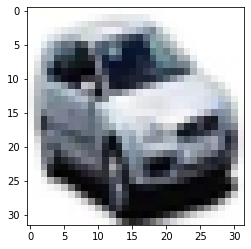

In [1486]:
imshow(tester[0][0])


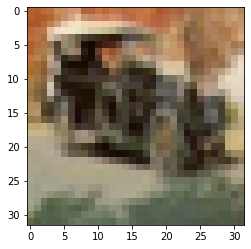

In [1487]:
imshow(tester[1][0])

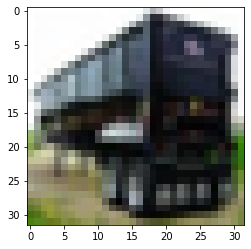

In [1488]:
imshow(tester[2][0])

In [1517]:
torch.nn.functional.pairwise_distance(net(img[0]), net(img[1])) 

tensor([0.3297], grad_fn=<NormBackward1>)

In [1518]:
torch.nn.functional.pairwise_distance(net(img[0]), net(img[2])) 

tensor([0.3988], grad_fn=<NormBackward1>)

In [1513]:
img = test.__getitem__(99)

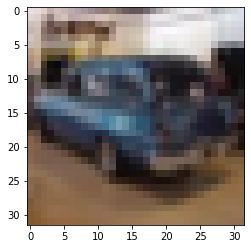

In [1514]:
imshow(img[0])

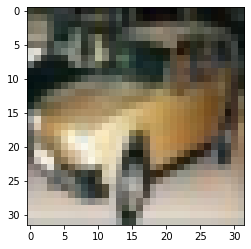

In [1515]:
imshow(img[1])

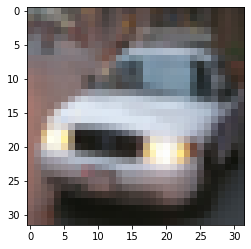

In [1516]:
imshow(img[2])